# Wrather forcasting using nural_p
Objective: Predict the temperature at 3pm. 


### Importing necessary libraries 

In [3]:
from neuralprophet import NeuralProphet
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Reading the data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/weatherAUS.csv')  #read the data into a data frame 
df.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Unnamed: 23
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


### Exploring the data

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.isnull().count()

Date             145460
Location         145460
MinTemp          145460
MaxTemp          145460
Rainfall         145460
Evaporation      145460
Sunshine         145460
WindGustDir      145460
WindGustSpeed    145460
WindDir9am       145460
WindDir3pm       145460
WindSpeed9am     145460
WindSpeed3pm     145460
Humidity9am      145460
Humidity3pm      145460
Pressure9am      145460
Pressure3pm      145460
Cloud9am         145460
Cloud3pm         145460
Temp9am          145460
Temp3pm          145460
RainToday        145460
RainTomorrow     145460
Unnamed: 23      145460
dtype: int64

In [9]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

### Creating a suitable dataframe 

In [10]:
mleb = df[df['Location'] == 'Melbourne']
mleb['Date']=pd.to_datetime(mleb['Date'])

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



In [11]:
mleb.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Unnamed: 23
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No,NaN
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes,NaN
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No,NaN
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No,NaN
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No,NaN


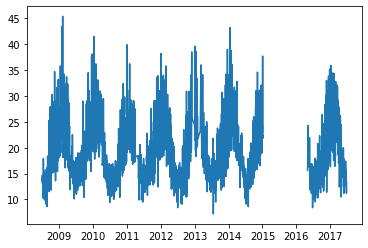

In [12]:
plt.plot(mleb['Date'], mleb['Temp3pm'])

#### we can see a large portion of data is missing from 2015 to almost the middle of 2016. Missing a large portion of data is really an issue. So, lets take care of it. 


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



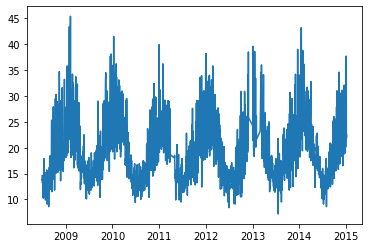

In [13]:
mleb['Year'] = mleb['Date'].apply(lambda x: x.year)
mleb = mleb[mleb['Year']<=2015]
plt.plot(mleb['Date'], mleb['Temp3pm'])
plt.show()

In [14]:
mleb.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Unnamed: 23,Year
69841,2015-12-22,Melbourne,NaN,NaN,NaN,6.8,12.3,SSE,31.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69842,2015-12-23,Melbourne,NaN,NaN,NaN,6.8,13.3,SSE,39.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69843,2015-12-24,Melbourne,NaN,NaN,NaN,9.3,13.1,N,50.0,NNE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69844,2015-12-25,Melbourne,NaN,NaN,NaN,18.0,13.3,N,74.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69845,2015-12-26,Melbourne,NaN,NaN,NaN,NaN,6.2,WSW,67.0,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


### Nural prophet expects two parameters: 

>DS- date
-------------------------
>y-  the value we want to predict. 


#### So, we are going to set date column as DS and Temp3pm as y

In [15]:
data = mleb[['Date', 'Temp3pm']]  #new dataframe 
data.dropna(inplace = True)
data.columns = ['ds', 'y'] 
data.head(10)


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6
67205,2008-07-06,14.6
67206,2008-07-07,13.3
67207,2008-07-08,10.3
67208,2008-07-09,13.1
67209,2008-07-10,12.2


### Train the model

In [30]:
m = NeuralProphet()
model = m.fit(data, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.01E-02, min: 9.33E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.05E-01, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.83E-02
Epoch[152/152]: 100%|██████████| 152/152 [00:22<00:00,  6.63it/s, SmoothL1Loss=0.0145, MAE=3.02, RMSE=3.91, RegLoss=0]



### Forcasting 



In [31]:
future = m.make_future_dataframe(data, periods=900)  
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.400715,NaN,20.668564,5.440090,0.292060
1,2015-01-07,None,26.228119,NaN,20.671577,5.576921,-0.020380
2,2015-01-08,None,26.442726,NaN,20.674595,5.709897,0.058235
3,2015-01-09,None,26.542652,NaN,20.677608,5.838321,0.026724
4,2015-01-10,None,26.637531,NaN,20.680626,5.961530,-0.004626


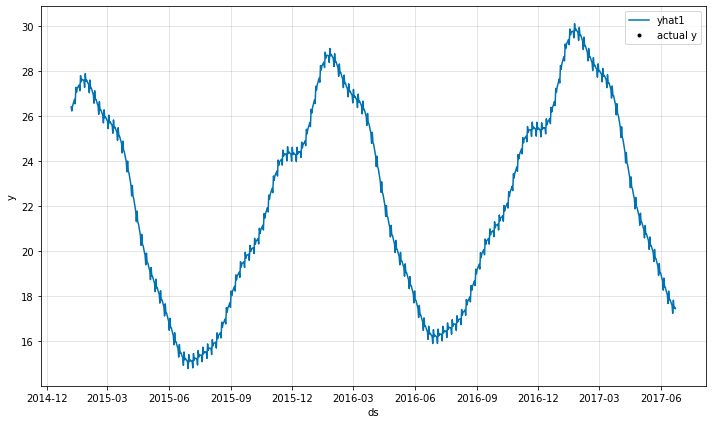

In [32]:
plot1 = m.plot(forecast)

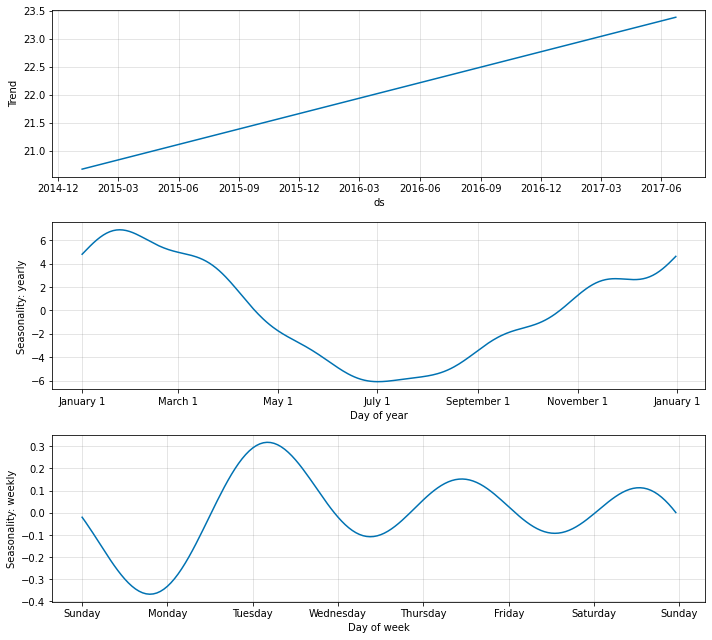

In [33]:
plt2 = m.plot_components(forecast)